<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/SlopesRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2 Classes**
* (1) prevention    36283
* (0) rapid         16337


**3 Classes**
* (1) normal        22980
* (0) rapid         16337
* (2) prevention    13303

## BI2

In [2]:
import pandas as pd
bi2 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /binary_2_Group_5_Fold.xlsx')
bi2 = bi2.iloc[:, 1:]
bi2

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,newL25:Parathyroid hormone,newL26:Vitamin D,newL27:UrineAlbumin/Cr ratio,newL28:UrineProtein/Cr ratio,newL29:UrineVolume (24hrs),newL30:UrineUrea (24hrs),newL31:UrineSodium (24hrs),newL32:UrineProtein (24hrs),Group,Fold
0,2299,3386255,-7.158596,90,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
1,2299,4546471,5.550691,90,90,0,0,0,0,0,...,1,1,1,1,1,1,1,1,prevention,1
2,2299,5812902,-6.063710,100,100,34,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
3,2299,6947220,-12.812245,35,0,1,35,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
4,2299,8186767,28.287500,100,0,15,0,0,0,0,...,1,1,1,1,1,1,1,1,prevention,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,100,100,0,0,0,0,0,...,1,1,0,0,1,1,1,1,prevention,4
52616,3319971,9270331,-0.692078,0,100,0,0,0,0,0,...,1,1,0,0,1,1,1,1,prevention,0
52617,3320048,9242721,7.217875,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,prevention,1
52618,3320050,9257281,-32.794557,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,2


In [3]:
bi2['NATNL'] = bi2['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [4]:
bi2 = bi2.sort_values(['PatientUID', 'PatientVisitUID'])
bi2['TimeDiff'] = bi2.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
bi2['TimeDiff'] = bi2['TimeDiff'].fillna(0)

In [5]:
bi2['time_t1'] = pd.to_datetime(bi2['time_t1'])

In [6]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(bi2[column].unique())}
    bi2[column] = bi2[column].map(encoding_map)

## BI3

In [7]:
import pandas as pd
bi3 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /binary_3_Group_5_Fold.xlsx')
bi3 = bi3.iloc[:, 1:]
bi3

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,newL25:Parathyroid hormone,newL26:Vitamin D,newL27:UrineAlbumin/Cr ratio,newL28:UrineProtein/Cr ratio,newL29:UrineVolume (24hrs),newL30:UrineUrea (24hrs),newL31:UrineSodium (24hrs),newL32:UrineProtein (24hrs),Group,Fold
0,2299,6947220,-12.812245,35,0,1,35,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
1,2299,3386255,-7.158596,90,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
2,2299,5812902,-6.063710,100,100,34,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
3,2299,4546471,5.550691,90,90,0,0,0,0,0,...,1,1,1,1,1,1,1,1,normal,1
4,2299,8186767,28.287500,100,0,15,0,0,0,0,...,1,1,1,1,1,1,1,1,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,100,100,0,0,0,0,0,...,1,1,0,0,1,1,1,1,prevention,4
52616,3319971,9270331,-0.692078,0,100,0,0,0,0,0,...,1,1,0,0,1,1,1,1,normal,0
52617,3320048,9242721,7.217875,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,normal,1
52618,3320050,9257281,-32.794557,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,2


In [8]:
bi3['NATNL'] = bi3['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [9]:
bi3 = bi3.sort_values(['PatientUID', 'PatientVisitUID'])
bi3['TimeDiff'] = bi3.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
bi3['TimeDiff'] = bi3['TimeDiff'].fillna(0)

In [10]:
bi3['time_t1'] = pd.to_datetime(bi3['time_t1'])

In [11]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(bi3[column].unique())}
    bi3[column] = bi3[column].map(encoding_map)

## MF2

In [12]:
import pandas as pd
data2 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /df_2_Group_5_Fold.xlsx')
data2 = data2.iloc[:, 1:]
data2

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold
0,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2016-08-15 08:13:26.043,...,91.00,5.284,215.00,81.00,123.00,99.00,21.019,1,rapid,1
1,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,2017-10-03 07:37:22.777,...,86.00,5.755,219.00,64.00,146.00,73.00,15.198,1,prevention,1
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,2018-12-12 07:58:57.190,...,100.00,5.300,193.00,62.00,129.00,65.00,30.879,1,rapid,1
3,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2019-12-19 08:19:38.647,...,89.00,5.562,205.00,69.00,139.00,76.00,36.916,1,rapid,1
4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,2021-03-04 07:55:40.703,...,88.00,5.500,198.00,74.00,129.00,60.00,28.684,1,prevention,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,0,1,0,2023-04-04 08:28:58.833,33.68,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:31.910,...,103.00,5.900,165.00,311.00,84.00,43.00,131.300,1,prevention,4
52616,3319971,9270331,-0.692078,0,1,0,2023-04-04 08:49:20.047,26.47,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:53.720,...,99.00,7.100,154.00,196.00,83.00,42.00,325.800,1,prevention,0
52617,3320048,9242721,7.217875,0,0,1,2023-04-10 08:36:15.217,70.36,OPD AE-DV191,2022-03-05 12:36:33.263,...,123.99,6.457,112.00,96.00,64.00,33.00,104.371,1,prevention,1
52618,3320050,9257281,-32.794557,0,1,0,2023-04-10 08:58:57.267,30.69,หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ,2022-03-10 07:42:44.243,...,96.00,5.715,202.31,93.29,136.63,67.35,27.246,1,rapid,2


In [13]:
data2['NATNL'] = data2['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [14]:
data2 = data2.sort_values(['PatientUID', 'PatientVisitUID'])
data2['TimeDiff'] = data2.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
data2['TimeDiff'] = data2['TimeDiff'].fillna(0)

In [15]:
data2['time_t1'] = pd.to_datetime(data2['time_t1'])

In [16]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(data2[column].unique())}
    data2[column] = data2[column].map(encoding_map)

## MF3

In [17]:
import pandas as pd
data3 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /df_3_Group_5_Fold.xlsx')
data3 = data3.iloc[:, 1:]
data3

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold
0,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2019-12-19 08:19:38.647,...,89.00,5.562,205.00,69.00,139.00,76.00,36.916,1,rapid,1
1,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2016-08-15 08:13:26.043,...,91.00,5.284,215.00,81.00,123.00,99.00,21.019,1,rapid,1
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,2018-12-12 07:58:57.190,...,100.00,5.300,193.00,62.00,129.00,65.00,30.879,1,rapid,1
3,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,2017-10-03 07:37:22.777,...,86.00,5.755,219.00,64.00,146.00,73.00,15.198,1,normal,1
4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,2021-03-04 07:55:40.703,...,88.00,5.500,198.00,74.00,129.00,60.00,28.684,1,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,0,1,0,2023-04-04 08:28:58.833,33.68,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:31.910,...,103.00,5.900,165.00,311.00,84.00,43.00,131.300,1,prevention,4
52616,3319971,9270331,-0.692078,0,1,0,2023-04-04 08:49:20.047,26.47,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:53.720,...,99.00,7.100,154.00,196.00,83.00,42.00,325.800,1,normal,0
52617,3320048,9242721,7.217875,0,0,1,2023-04-10 08:36:15.217,70.36,OPD AE-DV191,2022-03-05 12:36:33.263,...,123.99,6.457,112.00,96.00,64.00,33.00,104.371,1,normal,1
52618,3320050,9257281,-32.794557,0,1,0,2023-04-10 08:58:57.267,30.69,หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ,2022-03-10 07:42:44.243,...,96.00,5.715,202.31,93.29,136.63,67.35,27.246,1,rapid,2


In [18]:
data3['NATNL'] = data3['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [19]:
data3 = data3.sort_values(['PatientUID', 'PatientVisitUID'])
data3['TimeDiff'] = data3.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
data3['TimeDiff'] = data3['TimeDiff'].fillna(0)

In [20]:
data3['time_t1'] = pd.to_datetime(data3['time_t1'])

In [21]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(data3[column].unique())}
    data3[column] = data3[column].map(encoding_map)

# Stage

In [22]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตามระดับ 'eGFR'
def categorize_eGFR(eGFR_value):
    if eGFR_value >= 90:
        return 0
    elif 89.99 >= eGFR_value >= 60:
        return 1
    elif 59.99 >= eGFR_value >= 30:
        return 2
    elif 29.99 >= eGFR_value >= 15:
        return 3
    else:
        return 4

bi2['Stage'] = bi2['eGFR_t1'].apply(categorize_eGFR)
bi3['Stage'] = bi3['eGFR_t1'].apply(categorize_eGFR)
data2['Stage'] = data2['eGFR_t1'].apply(categorize_eGFR)
data3['Stage'] = data3['eGFR_t1'].apply(categorize_eGFR)

In [23]:
data2['Stage'].value_counts()

2    30362
1    16698
3     3407
4     1323
0      830
Name: Stage, dtype: int64

In [24]:
bi2['Stage'].value_counts()

2    30362
1    16698
3     3407
4     1323
0      830
Name: Stage, dtype: int64

In [25]:
bi3['Stage'].value_counts()

2    30362
1    16698
3     3407
4     1323
0      830
Name: Stage, dtype: int64

In [26]:
data3['Stage'].value_counts()

2    30362
1    16698
3     3407
4     1323
0      830
Name: Stage, dtype: int64

# Split Fold

In [27]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.5 MB/s eta 0:00:00


In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
import shap
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

## bi2

In [29]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
X = bi2.drop(['PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold', 'Slopes'], axis=1)
y = bi2['Slopes']
all_folds = bi2['Fold'].unique()
X_train_scaled_list_bi2 = []
y_train_list_bi2 = []
X_test_scaled_list_bi2 = []
y_test_list_bi2 = []
for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = bi2['Fold'].isin(train_folds)
    test_indices = bi2['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_train_scaled_list_bi2.append(X_train_scaled)
    y_train_list_bi2.append(y_train)
    X_test_scaled_list_bi2.append(X_test_scaled)
    y_test_list_bi2.append(y_test)
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
        zip(X_train_scaled_list_bi2, y_train_list_bi2, X_test_scaled_list_bi2, y_test_list_bi2, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices
    print(f"Training set size: {X_train_scaled_fold.shape}")
    print(f"Test set size: {X_test_scaled_fold.shape}")
    print(f"Folds in training set: {train_folds.tolist()}")
    print(f"Folds in test set: {test_fold}")
    print("---\n")


Training set size: (42017, 122)
Test set size: (10603, 122)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---

Training set size: (42184, 122)
Test set size: (10436, 122)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---

Training set size: (42274, 122)
Test set size: (10346, 122)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---

Training set size: (42027, 122)
Test set size: (10593, 122)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---

Training set size: (41978, 122)
Test set size: (10642, 122)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---



## bi3

In [30]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
X = bi3.drop(['PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold', 'Slopes'], axis=1)
y = bi3['Slopes']
all_folds = bi3['Fold'].unique()
X_train_scaled_list_bi3 = []
y_train_list_bi3 = []
X_test_scaled_list_bi3 = []
y_test_list_bi3 = []
for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = bi3['Fold'].isin(train_folds)
    test_indices = bi3['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_train_scaled_list_bi3.append(X_train_scaled)
    y_train_list_bi3.append(y_train)
    X_test_scaled_list_bi3.append(X_test_scaled)
    y_test_list_bi3.append(y_test)
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
        zip(X_train_scaled_list_bi3, y_train_list_bi3, X_test_scaled_list_bi3, y_test_list_bi3, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices
    print(f"Training set size: {X_train_scaled_fold.shape}")
    print(f"Test set size: {X_test_scaled_fold.shape}")
    print(f"Folds in training set: {train_folds.tolist()}")
    print(f"Folds in test set: {test_fold}")
    print("---\n")


Training set size: (42027, 122)
Test set size: (10593, 122)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---

Training set size: (42017, 122)
Test set size: (10603, 122)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---

Training set size: (41978, 122)
Test set size: (10642, 122)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---

Training set size: (42184, 122)
Test set size: (10436, 122)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---

Training set size: (42274, 122)
Test set size: (10346, 122)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---



## data2

In [31]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
X = data2.drop(['PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold', 'Slopes'], axis=1)
y = data2['Slopes']
all_folds = data2['Fold'].unique()
X_train_scaled_list_data2 = []
y_train_list_data2 = []
X_test_scaled_list_data2 = []
y_test_list_data2 = []
for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = data2['Fold'].isin(train_folds)
    test_indices = data2['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_train_scaled_list_data2.append(X_train_scaled)
    y_train_list_data2.append(y_train)
    X_test_scaled_list_data2.append(X_test_scaled)
    y_test_list_data2.append(y_test)
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
        zip(X_train_scaled_list_data2, y_train_list_data2, X_test_scaled_list_data2, y_test_list_data2, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices
    print(f"Training set size: {X_train_scaled_fold.shape}")
    print(f"Test set size: {X_test_scaled_fold.shape}")
    print(f"Folds in training set: {train_folds.tolist()}")
    print(f"Folds in test set: {test_fold}")
    print("---\n")


Training set size: (42184, 76)
Test set size: (10436, 76)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---

Training set size: (41978, 76)
Test set size: (10642, 76)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---

Training set size: (42017, 76)
Test set size: (10603, 76)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---

Training set size: (42274, 76)
Test set size: (10346, 76)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---

Training set size: (42027, 76)
Test set size: (10593, 76)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---



## data3

In [32]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
X = data3.drop(['PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold', 'Slopes'], axis=1)
y = data3['Slopes']
all_folds = data3['Fold'].unique()
X_train_scaled_list_data3 = []
y_train_list_data3 = []
X_test_scaled_list_data3 = []
y_test_list_data3 = []
for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = data3['Fold'].isin(train_folds)
    test_indices = data3['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_train_scaled_list_data3.append(X_train_scaled)
    y_train_list_data3.append(y_train)
    X_test_scaled_list_data3.append(X_test_scaled)
    y_test_list_data3.append(y_test)
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
        zip(X_train_scaled_list_data3, y_train_list_data3, X_test_scaled_list_data3, y_test_list_data3, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices
    print(f"Training set size: {X_train_scaled_fold.shape}")
    print(f"Test set size: {X_test_scaled_fold.shape}")
    print(f"Folds in training set: {train_folds.tolist()}")
    print(f"Folds in test set: {test_fold}")
    print("---\n")


Training set size: (42184, 76)
Test set size: (10436, 76)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---

Training set size: (42027, 76)
Test set size: (10593, 76)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---

Training set size: (42274, 76)
Test set size: (10346, 76)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---

Training set size: (42017, 76)
Test set size: (10603, 76)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---

Training set size: (41978, 76)
Test set size: (10642, 76)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---



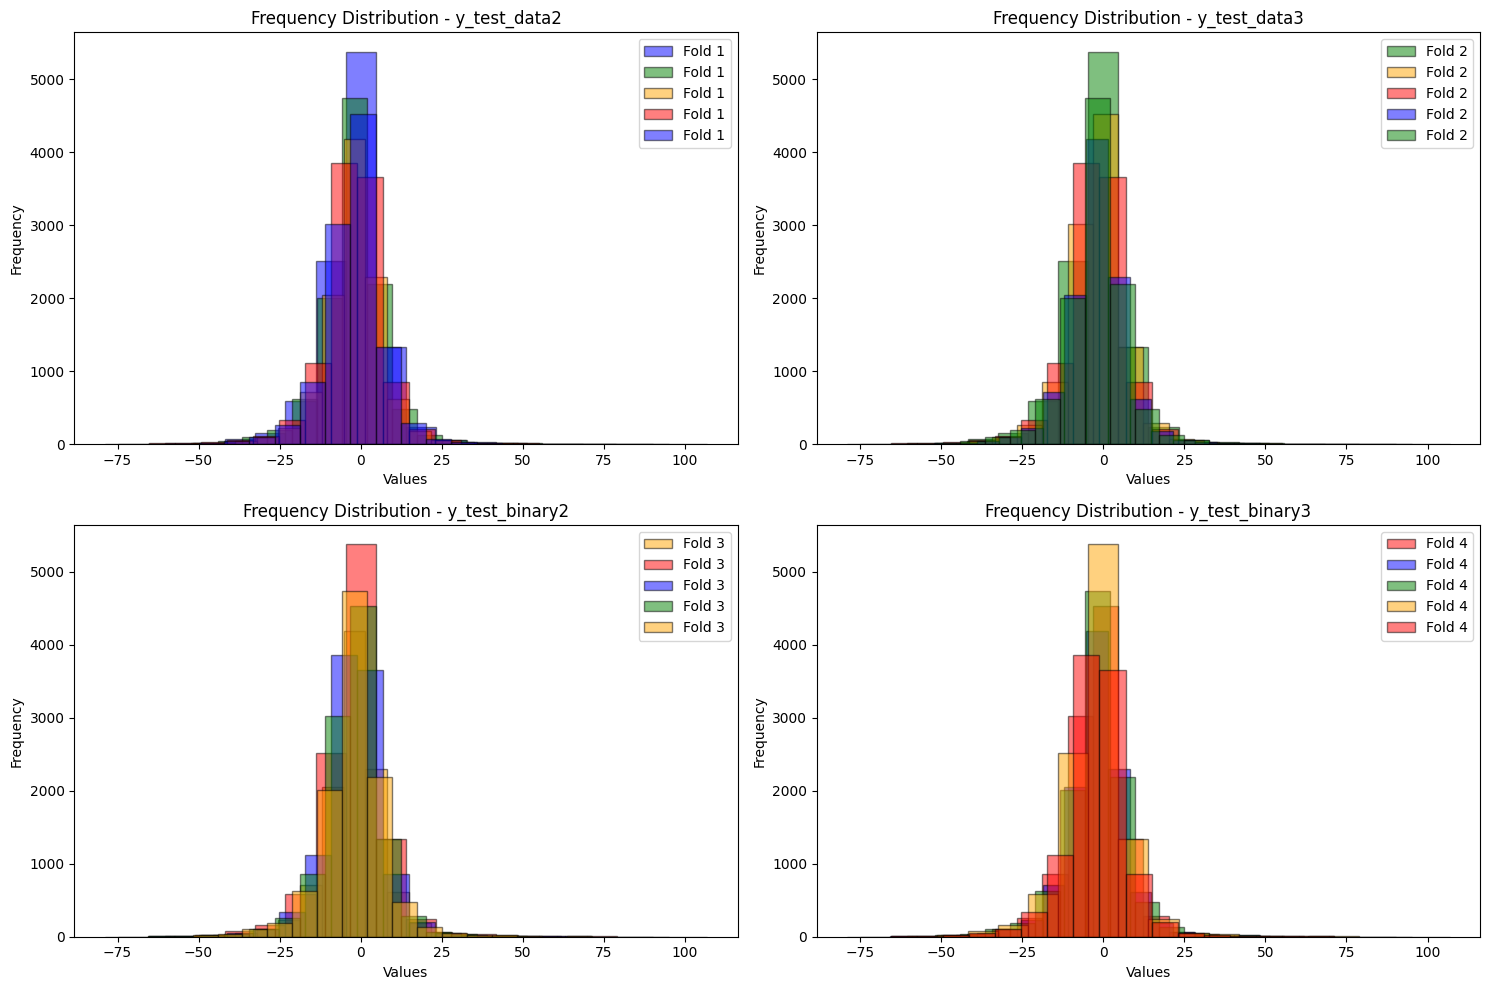

In [33]:
from itertools import cycle
all_lists_with_names = [
    ("y_test_data2", y_test_list_data2),
    ("y_test_data3", y_test_list_data3),
    ("y_test_binary2", y_test_list_bi2),
    ("y_test_binary3", y_test_list_bi3)
]

# Define a cycle of colors for the histograms
colors = cycle(['blue', 'green', 'orange', 'red'])

# Bar plot for the frequency of each value in the datasets
plt.figure(figsize=(15, 10))

for i, (list_name, current_list) in enumerate(all_lists_with_names, 1):
    plt.subplot(2, 2, i)
    for series, color in zip(current_list, colors):
        series.plot(kind='hist', bins=20, alpha=0.5, color=color, edgecolor='black', label=f'Fold {i}')
        plt.title(f'Frequency Distribution - {list_name}')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.legend()

plt.tight_layout()
plt.show()

In [34]:
y_test_list_data2

[9        -7.411572
 10       24.938876
 11       -1.606380
 12        4.056631
 22        0.334096
            ...    
 52599     7.391940
 52604     8.212500
 52609     8.638005
 52614    10.568365
 52619   -36.776371
 Name: Slopes, Length: 10436, dtype: float64,
 5        -8.126415
 6         0.877756
 7         0.169439
 8        -3.392731
 21       -9.794421
            ...    
 52598     7.978841
 52603    -0.565750
 52608    -7.454225
 52613    -1.342317
 52618   -32.794557
 Name: Slopes, Length: 10642, dtype: float64,
 15       -5.876161
 16        7.488793
 17      -27.716910
 18        7.290108
 19        6.853255
            ...    
 52596     3.956355
 52601     1.598681
 52606   -18.437432
 52611   -14.051193
 52616    -0.692078
 Name: Slopes, Length: 10603, dtype: float64,
 0        -7.158596
 1         5.550691
 2        -6.063710
 3       -12.812245
 4        28.287500
            ...    
 52597    -3.513125
 52602    -8.453133
 52607     1.460000
 52612    -8.774936
 5

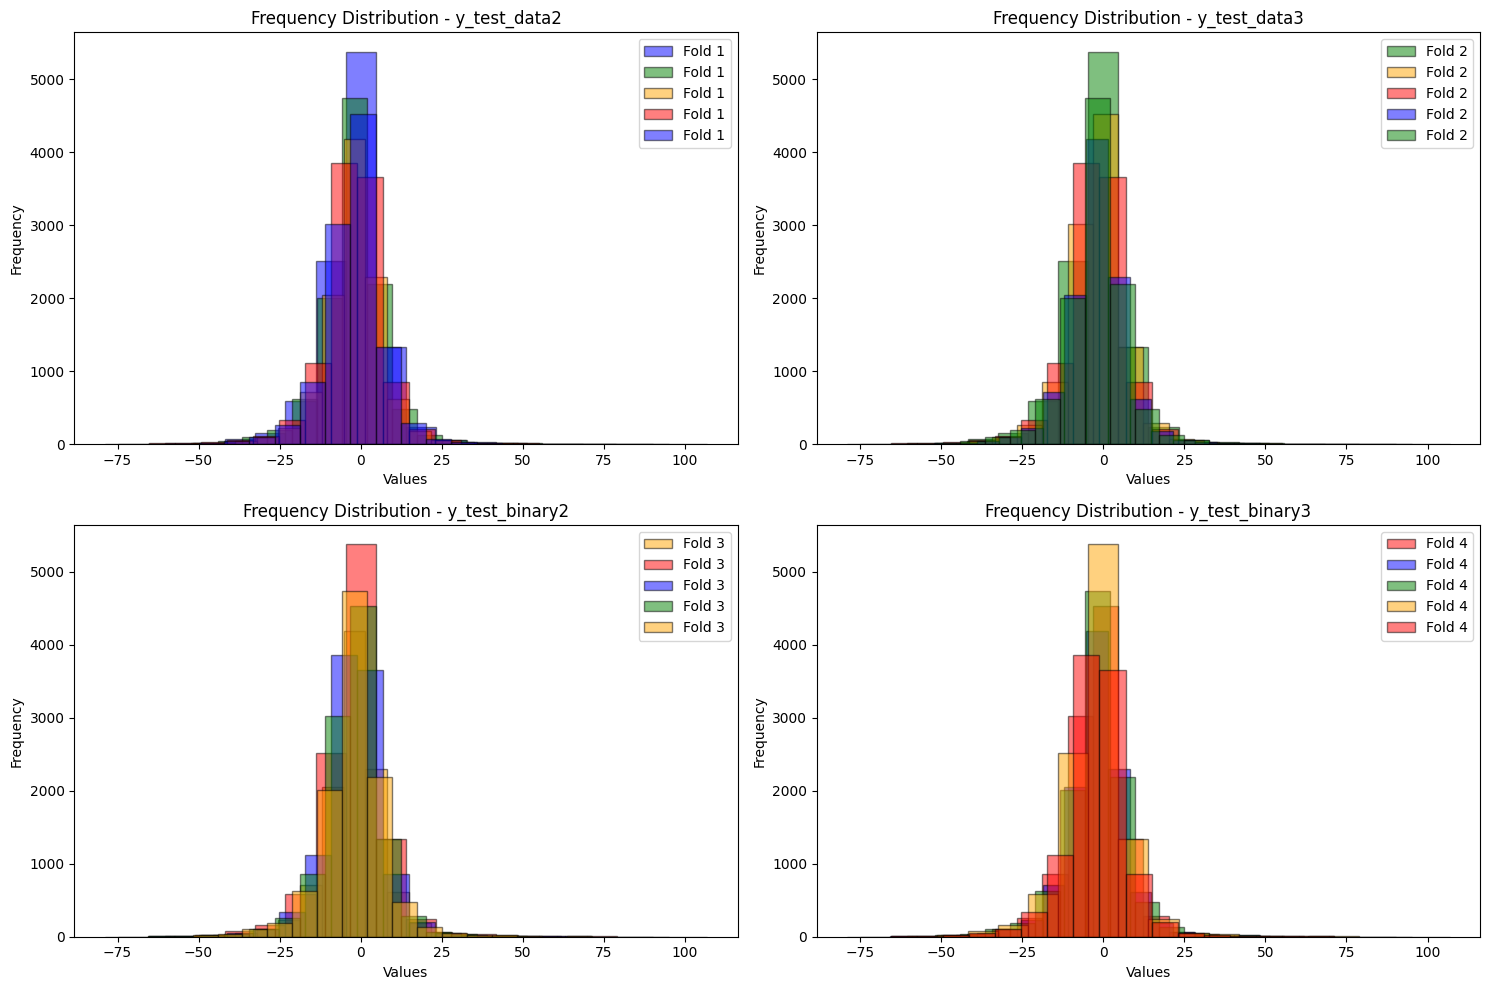

In [35]:
from itertools import cycle
all_lists_with_names = [
    ("y_test_data2", y_test_list_data2),
    ("y_test_data3", y_test_list_data3),
    ("y_test_binary2", y_test_list_bi2),
    ("y_test_binary3", y_test_list_bi3)
]

# Define a cycle of colors for the histograms
colors = cycle(['blue', 'green', 'orange', 'red'])

# Bar plot for the frequency of each value in the datasets
plt.figure(figsize=(15, 10))

for i, (list_name, current_list) in enumerate(all_lists_with_names, 1):
    plt.subplot(2, 2, i)
    for series, color in zip(current_list, colors):
        series.plot(kind='hist', bins=20, alpha=0.5, color=color, edgecolor='black', label=f'Fold {i}')
        plt.title(f'Frequency Distribution - {list_name}')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.legend()

plt.tight_layout()
plt.show()

In [36]:
!pip install scikeras

In [37]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model

## Data3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Fold 1 Evaluation Metrics:
Mean Squared Error: 19.8766
Mean Absolute Error: 2.8041
R-squared: 0.7959


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Fold 2 Evaluation Metrics:
Mean Squared Error: 19.5676
Mean Absolute Error: 2.8327
R-squared: 0.7790


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Fold 3 Evaluation Metrics:
Mean Squared Error: 19.0680
Mean Absolute Error: 2.8320
R-squared: 0.8084


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Fold 4 Evaluation Metrics:
Mean Squared Error: 18.7839
Mean Absolute Error: 2.8238
R-squared: 0.7995


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Fold 5 Evaluation Metrics:
Mean Squared Error: 20.7438
Mean Absolute Error: 2.8811
R-squared: 0.7920

Overall Mean Evaluation Metrics:
Mean Squared Error: 19.6080
Mean Absolute Error: 2.8347
Mean R-squared: 0.7950


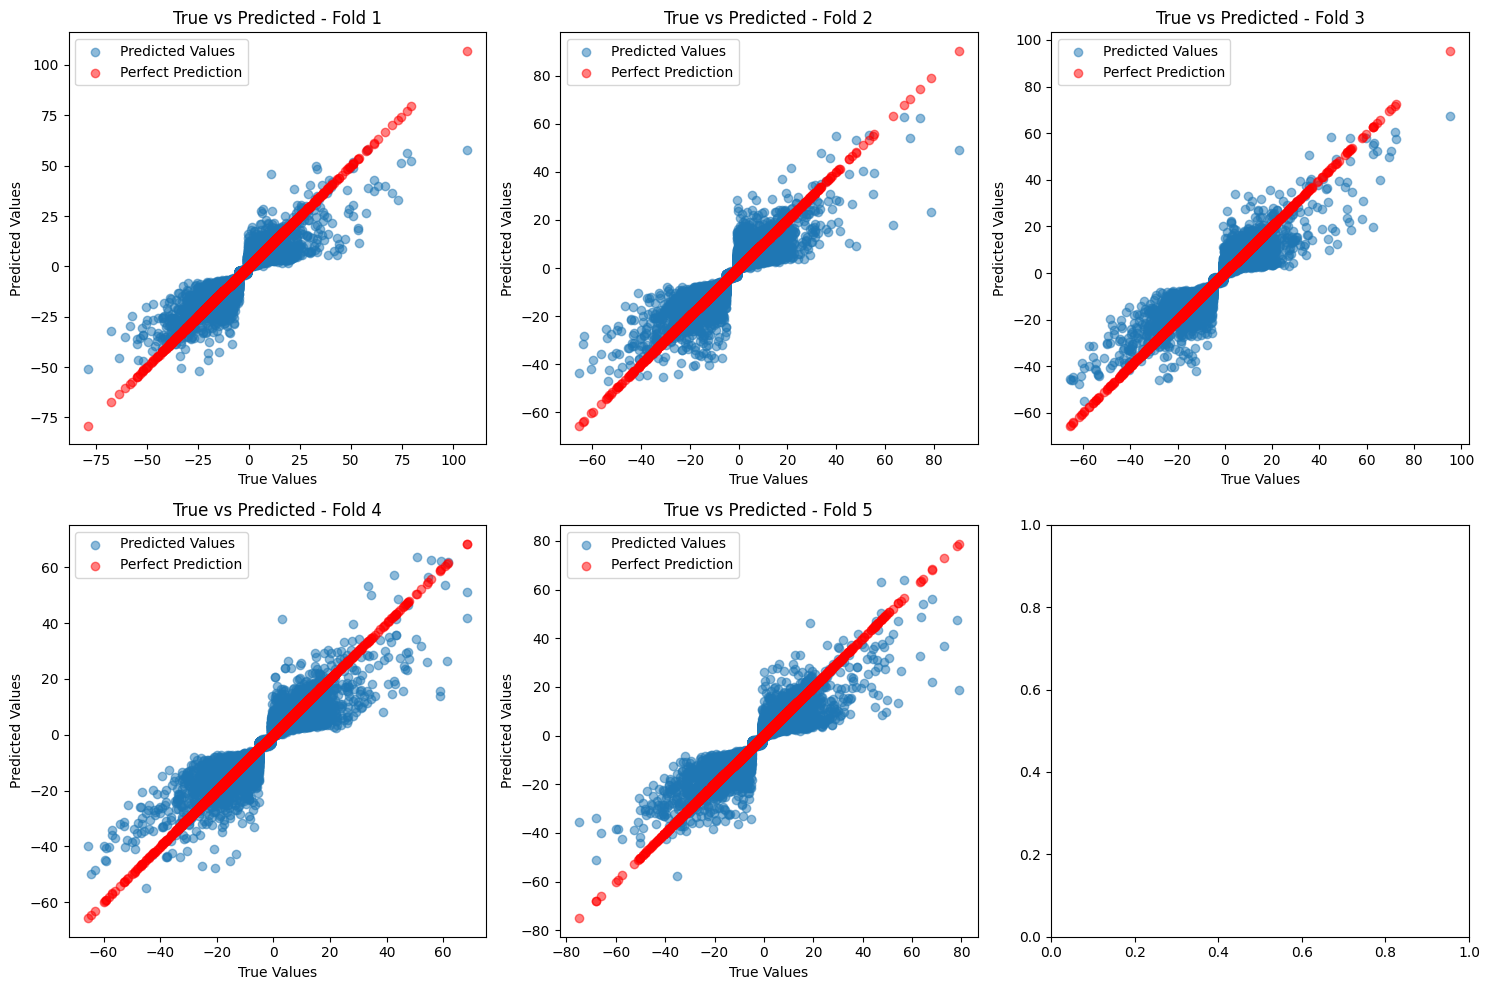

In [38]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

data3_mse_scores = []
data3_mae_scores = []
data3_r2_scores = []

# Create subplots for each fold
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

# Loop through each fold
for fold in range(5):
    # Fit the model on the training data for the current fold
    model.fit(X_train_scaled_list_data3[fold], y_train_list_data3[fold])

    # Make predictions on the test data for the current fold
    y_pred = model.predict(X_test_scaled_list_data3[fold])

    # Plot original vs predicted values as data points
    axs[fold].scatter(y_test_list_data3[fold], y_pred, label='Predicted Values', alpha=0.5)
    axs[fold].scatter(y_test_list_data3[fold], y_test_list_data3[fold], color='red', label='Perfect Prediction', alpha=0.5)
    axs[fold].set_title(f"True vs Predicted - Fold {fold + 1}")
    axs[fold].set_xlabel("True Values")
    axs[fold].set_ylabel("Predicted Values")
    axs[fold].legend()

    # Evaluate the model performance for the current fold
    mse = mean_squared_error(y_test_list_data3[fold], y_pred)
    mae = mean_absolute_error(y_test_list_data3[fold], y_pred)
    r2 = r2_score(y_test_list_data3[fold], y_pred)

    # Print evaluation metrics for the current fold
    print(f"\nFold {fold + 1} Evaluation Metrics:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

    # Append scores to the lists for overall evaluation
    data3_mse_scores.append(mse)
    data3_mae_scores.append(mae)
    data3_r2_scores.append(r2)

# Print mean scores across all folds
data3_mean_mse = sum(data3_mse_scores) / len(data3_mse_scores)
data3_mean_mae = sum(data3_mae_scores) / len(data3_mae_scores)
data3_mean_r2 = sum(data3_r2_scores) / len(data3_r2_scores)

print(f"\nOverall Mean Evaluation Metrics:")
print(f"Mean Squared Error: {data3_mean_mse:.4f}")
print(f"Mean Absolute Error: {data3_mean_mae:.4f}")
print(f"Mean R-squared: {data3_mean_r2:.4f}")

plt.tight_layout()
plt.show()


## Data2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Fold 1 Evaluation Metrics:
Mean Squared Error: 25.7913
Mean Absolute Error: 3.4151
R-squared: 0.7352


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Fold 2 Evaluation Metrics:
Mean Squared Error: 25.5164
Mean Absolute Error: 3.4592
R-squared: 0.7441


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Fold 3 Evaluation Metrics:
Mean Squared Error: 23.2570
Mean Absolute Error: 3.4015
R-squared: 0.7517


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Fold 4 Evaluation Metrics:
Mean Squared Error: 23.5486
Mean Absolute Error: 3.4023
R-squared: 0.7634


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Fold 5 Evaluation Metrics:
Mean Squared Error: 23.9305
Mean Absolute Error: 3.4034
R-squared: 0.7297

Overall Mean Evaluation Metrics:
Mean Squared Error: 24.4088
Mean Absolute Error: 3.4163
Mean R-squared: 0.7448


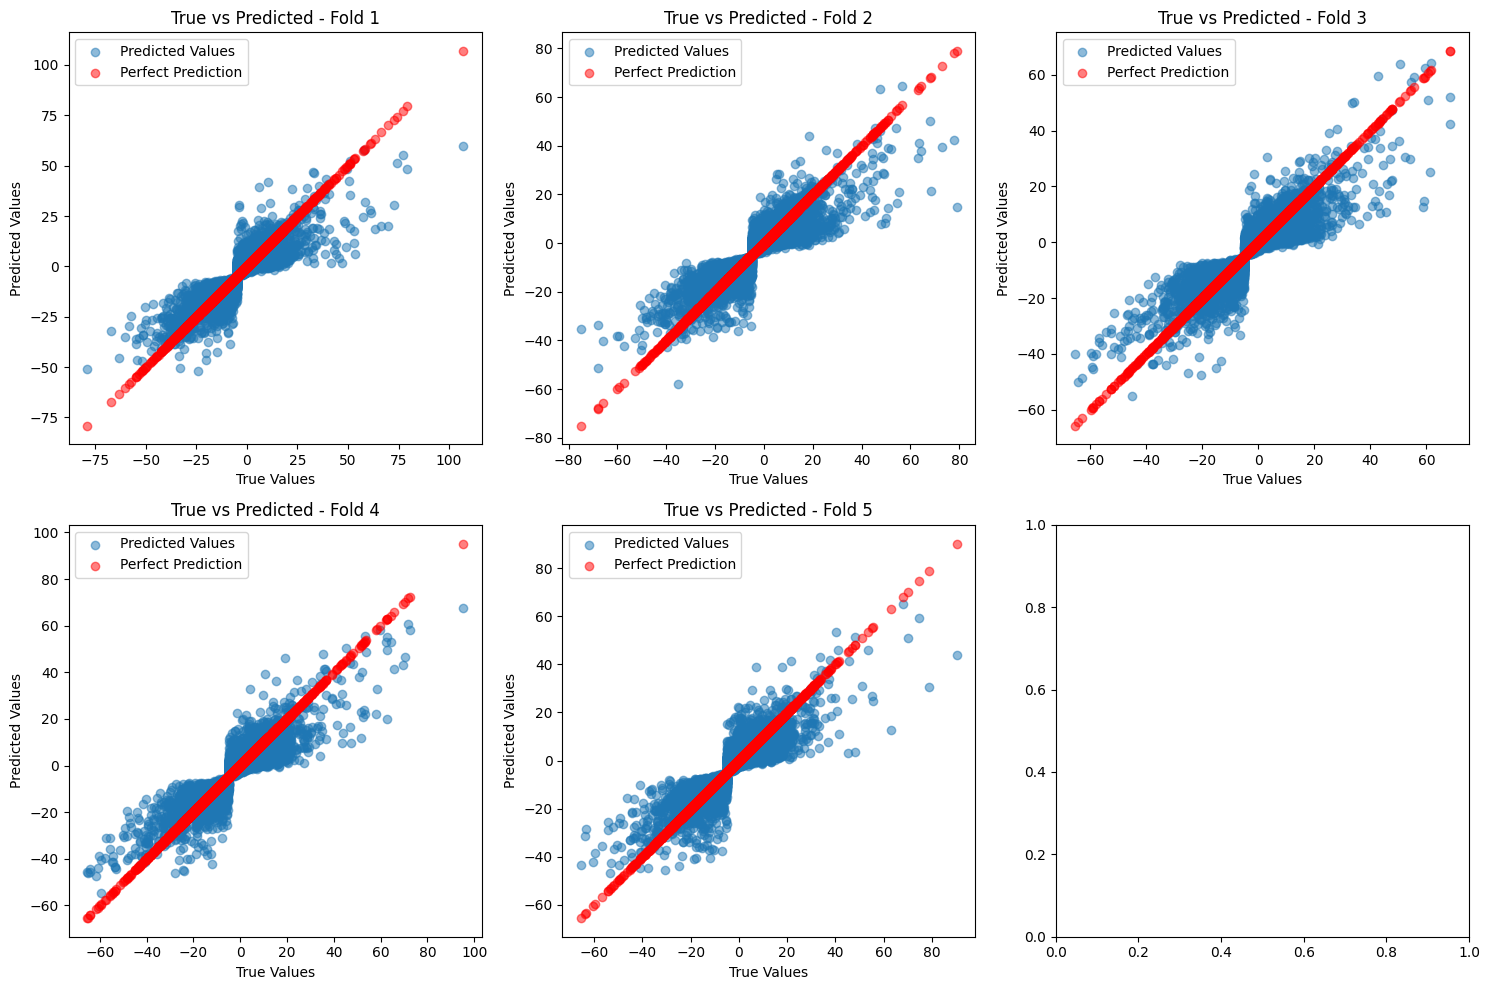

In [42]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)


data2_mse_scores = []
data2_mae_scores = []
data2_r2_scores = []

# Create subplots for each fold
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

# Loop through each fold
for fold in range(5):
    # Fit the model on the training data for the current fold
    model.fit(X_train_scaled_list_data2[fold], y_train_list_data2[fold])

    # Make predictions on the test data for the current fold
    y_pred = model.predict(X_test_scaled_list_data2[fold])

    # Plot original vs predicted values as data points
    axs[fold].scatter(y_test_list_data2[fold], y_pred, label='Predicted Values', alpha=0.5)
    axs[fold].scatter(y_test_list_data2[fold], y_test_list_data2[fold], color='red', label='Perfect Prediction', alpha=0.5)
    axs[fold].set_title(f"True vs Predicted - Fold {fold + 1}")
    axs[fold].set_xlabel("True Values")
    axs[fold].set_ylabel("Predicted Values")
    axs[fold].legend()

    # Evaluate the model performance for the current fold
    mse = mean_squared_error(y_test_list_data2[fold], y_pred)
    mae = mean_absolute_error(y_test_list_data2[fold], y_pred)
    r2 = r2_score(y_test_list_data2[fold], y_pred)

    # Print evaluation metrics for the current fold
    print(f"\nFold {fold + 1} Evaluation Metrics:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

    # Append scores to the lists for overall evaluation
    data2_mse_scores.append(mse)
    data2_mae_scores.append(mae)
    data2_r2_scores.append(r2)

# Print mean scores across all folds
data2_mean_mse = sum(data2_mse_scores) / len(data2_mse_scores)
data2_mean_mae = sum(data2_mae_scores) / len(data2_mae_scores)
data2_mean_r2 = sum(data2_r2_scores) / len(data2_r2_scores)

print(f"\nOverall Mean Evaluation Metrics:")
print(f"Mean Squared Error: {data2_mean_mse:.4f}")
print(f"Mean Absolute Error: {data2_mean_mae:.4f}")
print(f"Mean R-squared: {data2_mean_r2:.4f}")

plt.tight_layout()
plt.show()


## Binary2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Fold 1 Evaluation Metrics:
Mean Squared Error: 23.2946
Mean Absolute Error: 3.3818
R-squared: 0.7513


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Fold 2 Evaluation Metrics:
Mean Squared Error: 25.0931
Mean Absolute Error: 3.3745
R-squared: 0.7424


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Fold 3 Evaluation Metrics:
Mean Squared Error: 23.4701
Mean Absolute Error: 3.3889
R-squared: 0.7642


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Fold 4 Evaluation Metrics:
Mean Squared Error: 23.5912
Mean Absolute Error: 3.3838
R-squared: 0.7335


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Fold 5 Evaluation Metrics:
Mean Squared Error: 25.8137
Mean Absolute Error: 3.4465
R-squared: 0.7411

Overall Mean Evaluation Metrics:
Mean Squared Error: 24.2525
Mean Absolute Error: 3.3951
Mean R-squared: 0.7465


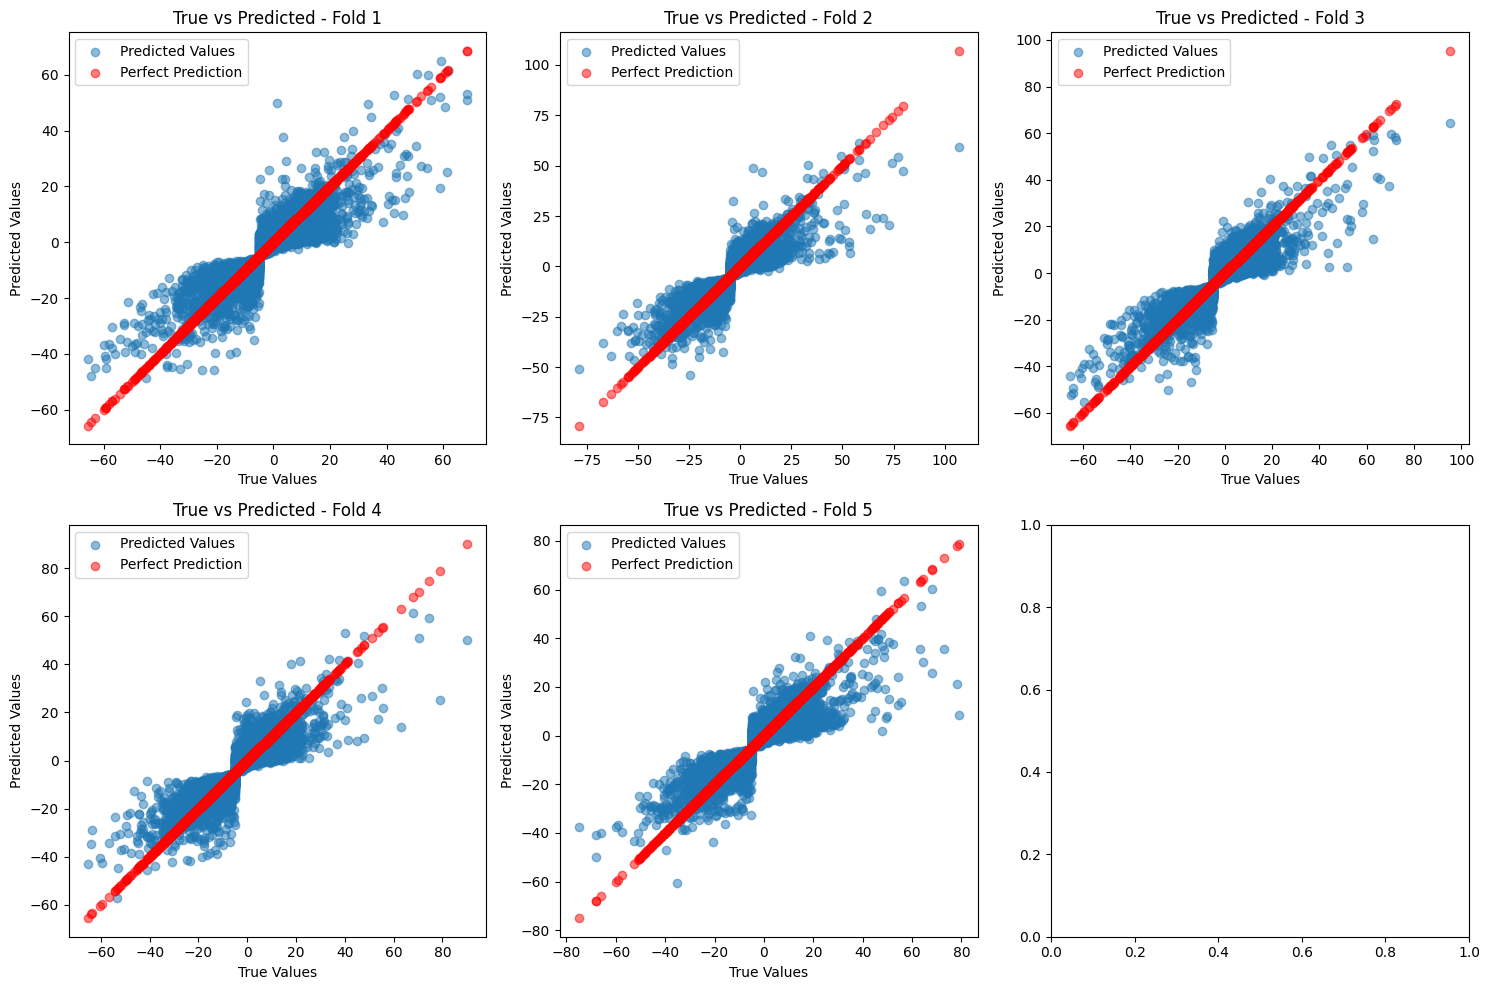

In [39]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)


bi2_mse_scores = []
bi2_mae_scores = []
bi2_r2_scores = []

# Create subplots for each fold
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

# Loop through each fold
for fold in range(5):
    # Fit the model on the training data for the current fold
    model.fit(X_train_scaled_list_bi2[fold], y_train_list_bi2[fold])

    # Make predictions on the test data for the current fold
    y_pred = model.predict(X_test_scaled_list_bi2[fold])

    # Plot original vs predicted values as data points
    axs[fold].scatter(y_test_list_bi2[fold], y_pred, label='Predicted Values', alpha=0.5)
    axs[fold].scatter(y_test_list_bi2[fold], y_test_list_bi2[fold], color='red', label='Perfect Prediction', alpha=0.5)
    axs[fold].set_title(f"True vs Predicted - Fold {fold + 1}")
    axs[fold].set_xlabel("True Values")
    axs[fold].set_ylabel("Predicted Values")
    axs[fold].legend()

    # Evaluate the model performance for the current fold
    mse = mean_squared_error(y_test_list_bi2[fold], y_pred)
    mae = mean_absolute_error(y_test_list_bi2[fold], y_pred)
    r2 = r2_score(y_test_list_bi2[fold], y_pred)

    # Print evaluation metrics for the current fold
    print(f"\nFold {fold + 1} Evaluation Metrics:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

    # Append scores to the lists for overall evaluation
    bi2_mse_scores.append(mse)
    bi2_mae_scores.append(mae)
    bi2_r2_scores.append(r2)

# Print mean scores across all folds
bi2_mean_mse = sum(bi2_mse_scores) / len(bi2_mse_scores)
bi2_mean_mae = sum(bi2_mae_scores) / len(bi2_mae_scores)
bi2_mean_r2 = sum(bi2_r2_scores) / len(bi2_r2_scores)

print(f"\nOverall Mean Evaluation Metrics:")
print(f"Mean Squared Error: {bi2_mean_mse:.4f}")
print(f"Mean Absolute Error: {bi2_mean_mae:.4f}")
print(f"Mean R-squared: {bi2_mean_r2:.4f}")

plt.tight_layout()
plt.show()


## Binary3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Fold 1 Evaluation Metrics:
Mean Squared Error: 19.3955
Mean Absolute Error: 2.8253
R-squared: 0.7809


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Fold 2 Evaluation Metrics:
Mean Squared Error: 18.6887
Mean Absolute Error: 2.8055
R-squared: 0.8005


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Fold 3 Evaluation Metrics:
Mean Squared Error: 20.6999
Mean Absolute Error: 2.8669
R-squared: 0.7924


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Fold 4 Evaluation Metrics:
Mean Squared Error: 19.5704
Mean Absolute Error: 2.7796
R-squared: 0.7991


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Fold 5 Evaluation Metrics:
Mean Squared Error: 19.1018
Mean Absolute Error: 2.8162
R-squared: 0.8081

Overall Mean Evaluation Metrics:
Mean Squared Error: 19.4913
Mean Absolute Error: 2.8187
Mean R-squared: 0.7962


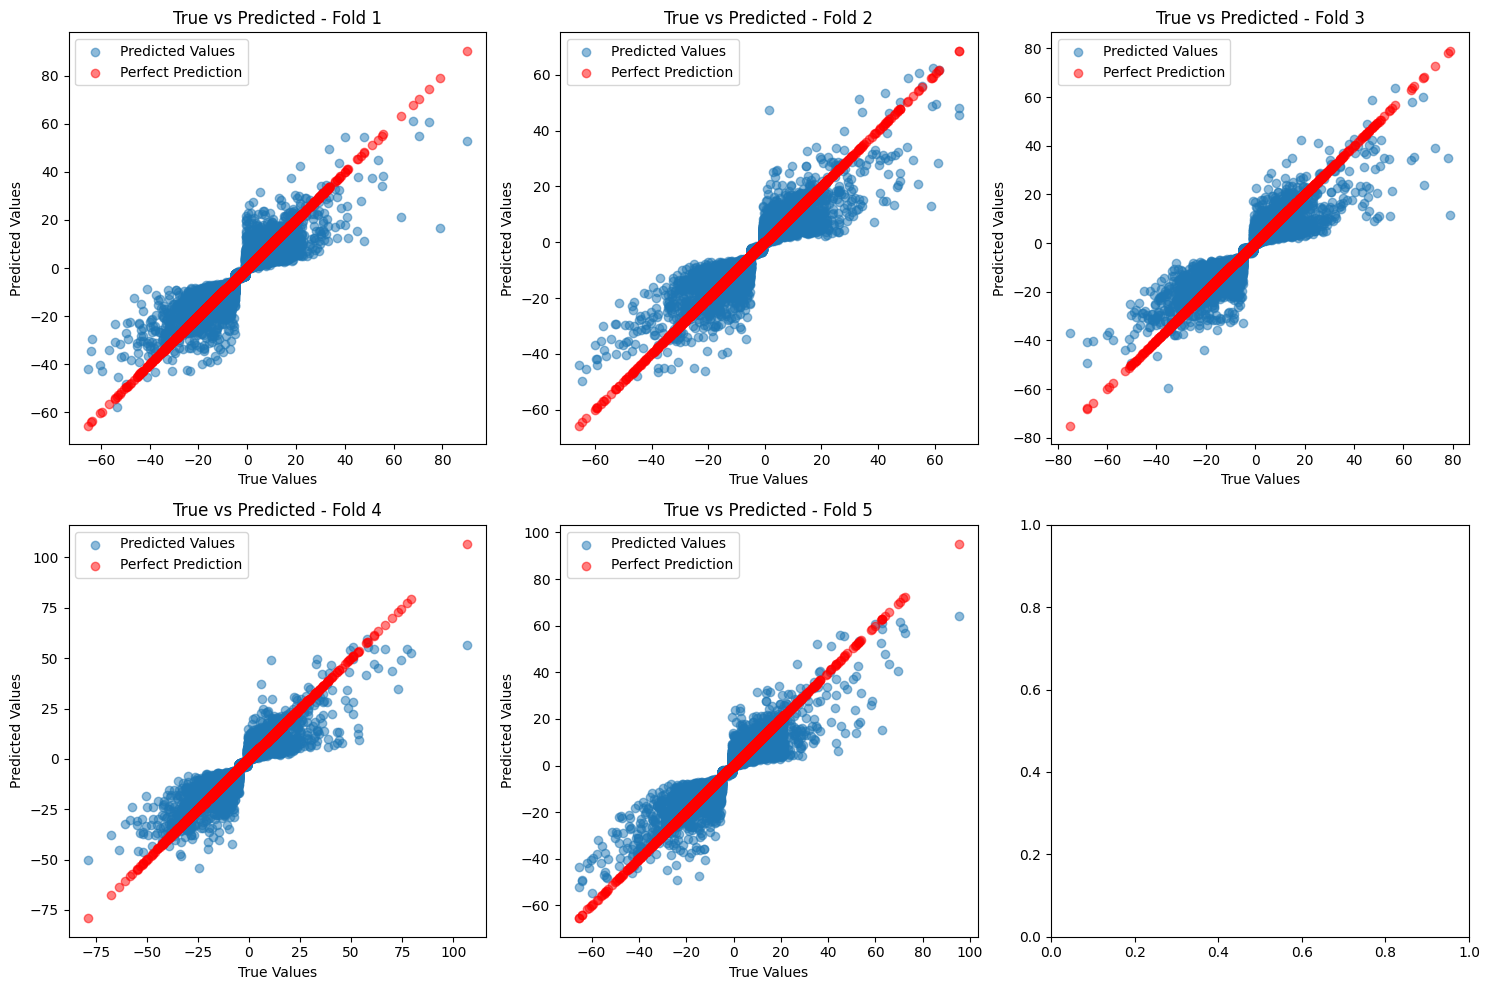

In [40]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

bi3_mse_scores = []
bi3_mae_scores = []
bi3_r2_scores = []

# Create subplots for each fold
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

# Loop through each fold
for fold in range(5):
    # Fit the model on the training data for the current fold
    model.fit(X_train_scaled_list_bi3[fold], y_train_list_bi3[fold])

    # Make predictions on the test data for the current fold
    y_pred = model.predict(X_test_scaled_list_bi3[fold])

    # Plot original vs predicted values as data points
    axs[fold].scatter(y_test_list_bi3[fold], y_pred, label='Predicted Values', alpha=0.5)
    axs[fold].scatter(y_test_list_bi3[fold], y_test_list_bi3[fold], color='red', label='Perfect Prediction', alpha=0.5)
    axs[fold].set_title(f"True vs Predicted - Fold {fold + 1}")
    axs[fold].set_xlabel("True Values")
    axs[fold].set_ylabel("Predicted Values")
    axs[fold].legend()

    # Evaluate the model performance for the current fold
    mse = mean_squared_error(y_test_list_bi3[fold], y_pred)
    mae = mean_absolute_error(y_test_list_bi3[fold], y_pred)
    r2 = r2_score(y_test_list_bi3[fold], y_pred)

    # Print evaluation metrics for the current fold
    print(f"\nFold {fold + 1} Evaluation Metrics:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

    # Append scores to the lists for overall evaluation
    bi3_mse_scores.append(mse)
    bi3_mae_scores.append(mae)
    bi3_r2_scores.append(r2)

# Print mean scores across all folds
bi3_mean_mse = sum(bi3_mse_scores) / len(bi3_mse_scores)
bi3_mean_mae = sum(bi3_mae_scores) / len(bi3_mae_scores)
bi3_mean_r2 = sum(bi3_r2_scores) / len(bi3_r2_scores)

print(f"\nOverall Mean Evaluation Metrics:")
print(f"Mean Squared Error: {bi3_mean_mse:.4f}")
print(f"Mean Absolute Error: {bi3_mean_mae:.4f}")
print(f"Mean R-squared: {bi3_mean_r2:.4f}")

plt.tight_layout()
plt.show()


# Summary

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data3_df = pd.DataFrame({
    'Fold': list(range(1, 6)),
    'MSE': data3_mse_scores,
    'MAE': data3_mae_scores,
    'R2': data3_r2_scores
})

data2_df = pd.DataFrame({
    'Fold': list(range(1, 6)),
    'MSE': data2_mse_scores,
    'MAE': data2_mae_scores,
    'R2': data2_r2_scores
})

bi3_df = pd.DataFrame({
    'Fold': list(range(1, 6)),
    'MSE': bi3_mse_scores,
    'MAE': bi3_mae_scores,
    'R2': bi3_r2_scores
})

bi2_df = pd.DataFrame({
    'Fold': list(range(1, 6)),
    'MSE': bi2_mse_scores,
    'MAE': bi2_mae_scores,
    'R2': bi2_r2_scores
})

# Concatenate the DataFrames to create a summary DataFrame
summary_df = pd.concat({
    'Data3': data3_df,
    'Data2': data2_df,
    'Binary3': bi3_df,
    'Binary2': bi2_df
}, axis=1)

summary_df


Data3                                Data2                                 \
   Fold        MSE       MAE        R2  Fold        MSE       MAE        R2   
0     1  19.876639  2.804060  0.795936     1  25.791343  3.415088  0.735213   
1     2  19.567649  2.832685  0.778976     2  25.516426  3.459184  0.744094   
2     3  19.067954  2.831992  0.808449     3  23.256971  3.401546  0.751714   
3     4  18.783926  2.823785  0.799467     4  23.548568  3.402286  0.763438   
4     5  20.743839  2.881115  0.791958     5  23.930470  3.403402  0.729696   

  Binary3                                Binary2                       \
     Fold        MSE       MAE        R2    Fold        MSE       MAE   
0       1  19.395480  2.825322  0.780920       1  23.294615  3.381785   
1       2  18.688677  2.805522  0.800484       2  25.093051  3.374454   
2       3  20.699916  2.866873  0.792399       3  23.470133  3.388945   
3       4  19.570430  2.779572  0.799080       4  23.591230  3.383768   
4       5  19.101764  2.816170  0.808110       5  25.813678  3.446477   

             
         R2  
0  0.751312  
1  0.742382  
2  0.764226  
3  0.733528  
4  0.741112

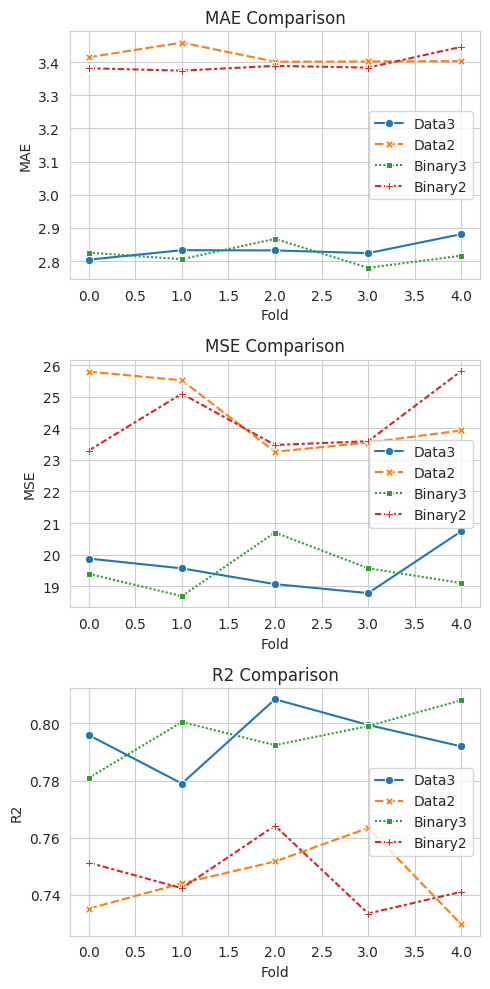

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Create subplots for MAE, MSE, and R2
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 10))

# List of metrics
metrics = ['MAE', 'MSE', 'R2']

# Loop through each metric and create a line plot
for i, metric in enumerate(metrics):
    sns.lineplot(data=summary_df.xs(metric, axis=1, level=1), markers=True, ax=axes[i])

    # Add titles and labels
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_xlabel('Fold')
    axes[i].set_ylabel(metric)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


Binary3 ดีสุด